#Análisis exploratorio LDA

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path_in="gdrive/MyDrive/st1800-231/datasets/trabajo2/"
path_out="gdrive/MyDrive/st1800-231/"
filename='twitterClimateData.csv.zip'

In [ ]:
!git clone 'https://github.com/st1800eafit/st1800-231.git'

In [4]:
!pip install gensim
!pip install nltk
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 14.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [5]:
import nltk
import re
import pandas as pd
import numpy as np
import re
from zipfile import ZipFile
import codecs
import matplotlib.pyplot as plt


In [6]:
zip_file = ZipFile(path_in+filename)
df = pd.read_csv(zip_file.open('twitterClimateData.csv'),delimiter=';')
df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [7]:
uniqueTopics = df.search_hashtags.unique()
uniqueTopics.size

12

In [8]:
# settings en nltk: tokenizador y stopwords
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df2 = df[['text','search_hashtags']]
df2.head()

,text,search_hashtags
0,"2020 is the year we #votethemout, the year we ...",#climatestrike
1,Winter has not stopped this group of dedicated...,#climatestrike
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#climatestrike
3,"A year of resistance, as youth protests shaped...",#climatestrike
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#climatestrike


In [10]:
def textprep(line):
    tokens = nltk.word_tokenize(str(line))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk] 
    return tokens

In [11]:
df2['tokens_text'] = df2.apply(lambda row: textprep(row['text']), axis=1)
df2.head()

<ipython-input-11-ff68ef2bd581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tokens_text'] = df2.apply(lambda row: textprep(row['text']), axis=1)


,text,search_hashtags,tokens_text
0,"2020 is the year we #votethemout, the year we ...",#climatestrike,"[2020, year, votethemout, year, climatestrike,..."
1,Winter has not stopped this group of dedicated...,#climatestrike,"[winter, stopped, group, dedicated, climate, a..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#climatestrike,"[week, 55, climatestrike, un, next, week, frid..."
3,"A year of resistance, as youth protests shaped...",#climatestrike,"[year, resistance, youth, protests, shaped, cl..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#climatestrike,"[happy, holidays, greta, gretathunberg, climat..."


In [12]:
# Creación del BoW - en gensim es Dictionary
from gensim.corpora import Dictionary
dictionary = Dictionary(df2.tokens_text)

In [13]:
corpus = [dictionary.doc2bow(doc) for doc in df2.tokens_text]

In [14]:
print(corpus[:5])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4)], [(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(0, 1), (2, 1), (15, 1), (17, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2)], [(0, 1), (2, 1), (15, 1), (17, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2)], [(2, 1), (17, 1), (53, 1), (55, 1), (56, 1), (58, 1), (59, 1), (60, 1), (62, 1), (63, 1), (67, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)]]


In [15]:
print(dictionary)

Dictionary(94334 unique tokens: ['2020', '33', 'climatestrike', 'done', 'else']...)


In [16]:
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in df2.tokens_text])
pool.close()
print(time.time()-t0)

3.3049204349517822


In [17]:
from gensim.models.ldamulticore import LdaMulticore

t0 = time.time()
lda_model = LdaMulticore(doc_term_matrix, num_topics=12, id2word = dictionary)
print(time.time()-t0)

161.60144782066345


In [18]:
def assigntopic(doc):
    vector = lda_model[dictionary.doc2bow(doc)] 
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    #vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    vector = max(vector,key=lambda item: item[1])
    return vector

In [19]:
df2['topics'] = df2.apply(lambda row: assigntopic(row['tokens_text']), axis=1)
df2.head()

<ipython-input-19-5a684547a125>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['topics'] = df2.apply(lambda row: assigntopic(row['tokens_text']), axis=1)


,text,search_hashtags,tokens_text,topics
0,"2020 is the year we #votethemout, the year we ...",#climatestrike,"[2020, year, votethemout, year, climatestrike,...","(1, 0.5424527)"
1,Winter has not stopped this group of dedicated...,#climatestrike,"[winter, stopped, group, dedicated, climate, a...","(2, 0.4259168)"
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#climatestrike,"[week, 55, climatestrike, un, next, week, frid...","(10, 0.30074367)"
3,"A year of resistance, as youth protests shaped...",#climatestrike,"[year, resistance, youth, protests, shaped, cl...","(0, 0.6262327)"
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#climatestrike,"[happy, holidays, greta, gretathunberg, climat...","(0, 0.68343437)"


In [20]:
df2['topic']  = df2['topics'].str[0]
df2.head()

<ipython-input-20-08a495c2cee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['topic']  = df2['topics'].str[0]


,text,search_hashtags,tokens_text,topics,topic
0,"2020 is the year we #votethemout, the year we ...",#climatestrike,"[2020, year, votethemout, year, climatestrike,...","(1, 0.5424527)",1
1,Winter has not stopped this group of dedicated...,#climatestrike,"[winter, stopped, group, dedicated, climate, a...","(2, 0.4259168)",2
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#climatestrike,"[week, 55, climatestrike, un, next, week, frid...","(10, 0.30074367)",10
3,"A year of resistance, as youth protests shaped...",#climatestrike,"[year, resistance, youth, protests, shaped, cl...","(0, 0.6262327)",0
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#climatestrike,"[happy, holidays, greta, gretathunberg, climat...","(0, 0.68343437)",0


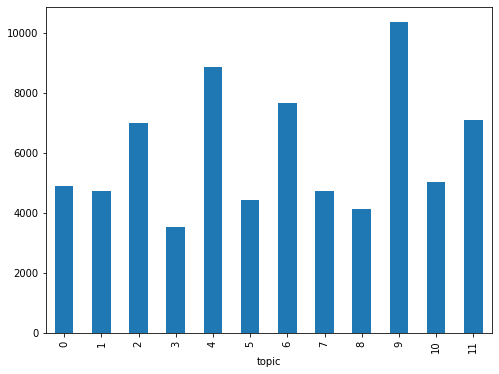

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df2.groupby('topic').text.count().plot.bar(ylim=0)
plt.show()

In [22]:
df2.groupby('topic').text.count()

topic
0      4901
1      4716
2      6989
3      3542
4      8855
5      4414
6      7646
7      4723
8      4140
9     10341
10     5040
11     7098
Name: text, dtype: int64

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df2.text).toarray()
labels = df2.topic
features.shape

(72405, 50906)

In [24]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
#Obtener los topicos unicos
uniqueTopics = df2.topic.unique()
for topic in sorted(uniqueTopics):
  features_chi2 = chi2(features, labels == topic)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(topic))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '0':
  . Most correlated unigrams:
. earth
. savetheplanet
  . Most correlated bigrams:
. zerowaste ecofriendly
. climatesciwatch climatechange
# '1':
  . Most correlated unigrams:
. smoke
. bushfires
  . Most correlated bigrams:
. climatechange wildfires
. fridayfeeling fridaymotivation
# '2':
  . Most correlated unigrams:
. park
. climatestrikenyc
  . Most correlated bigrams:
. foley square
. climatestrike climatestrikenyc
# '3':
  . Most correlated unigrams:
. en
. la
  . Most correlated bigrams:
. possible necessary
. necessary pass
# '4':
  . Most correlated unigrams:
. albuquerque
. climatecrisis
  . Most correlated bigrams:
. especially dedicated
. dedicated students
# '5':
  . Most correlated unigrams:
. designresearch
. slowfashion
  . Most correlated bigrams:
. designresearch climateaction
. designthinking designup
# '6':
  . Most correlated unigrams:
. change
. climatechange
  . Most correlated bigrams:
. climateaction wecanstillbeactivefromtheclassroom
. climate change
# 

#Clasificador de Naive Bayes utilizando LDA

In [26]:

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()


#Separar dataser en datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['topic'], random_state = 0)

In [ ]:
X_train.count()

54303

In [ ]:
X_test

49115    .@POLITICOEurope debate on #futureofeurope: Do...
53552    Just some encouraging words for our ladies and...
64221    Check out how @louiselassalle sees #Lifedesign...
4141     Half of America led by #RadicalDems are #Chick...
60129    A sneak peek at one of the insights that’s com...
                               ...                        
29788    Day 2 of our promotional campaign for #YouthCl...
32137    Reviewing the #SDG13 = #ClimateAction on a FRI...
67154          We need a #GreenNewDeal now! #ClimateCrisis
29907    @ipinst/@NorwayUN event on #HR and #agenda2030...
38049    #ClimateStrike #ClimateChange TODAY IS THE DAY...
Name: text, Length: 18102, dtype: object

In [ ]:
y_train.count()

54303

In [ ]:
y_test.count()

18102

In [32]:
#Term Frecuency - TF
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [ ]:
print(X_train_counts)

  (0, 77918)	1
  (0, 53353)	1
  (0, 38780)	1
  (0, 80538)	1
  (0, 13008)	1
  (0, 45133)	1
  (0, 34779)	1
  (0, 59596)	1
  (0, 40132)	1
  (0, 49329)	1
  (0, 18268)	1
  (0, 18893)	1
  (0, 9212)	1
  (0, 59615)	1
  (0, 20738)	1
  (0, 67329)	1
  (0, 7957)	1
  (0, 14426)	1
  (0, 69535)	1
  (0, 32812)	1
  (0, 20198)	1
  (0, 18817)	1
  (0, 30941)	1
  (0, 52468)	1
  (0, 20366)	1
  :	:
  (54302, 75869)	1
  (54302, 18556)	1
  (54302, 78325)	1
  (54302, 52476)	1
  (54302, 33542)	1
  (54302, 37575)	1
  (54302, 46179)	1
  (54302, 63021)	1
  (54302, 20474)	1
  (54302, 63693)	1
  (54302, 29609)	1
  (54302, 66726)	1
  (54302, 18202)	1
  (54302, 80225)	1
  (54302, 53116)	1
  (54302, 52175)	1
  (54302, 21406)	2
  (54302, 37431)	1
  (54302, 13603)	1
  (54302, 14419)	1
  (54302, 30488)	1
  (54302, 4819)	1
  (54302, 56699)	1
  (54302, 53118)	1
  (54302, 36984)	1


In [33]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
print(X_train_tfidf)

  (0, 80538)	0.17486569459456727
  (0, 77918)	0.17834065855682216
  (0, 69535)	0.18358318727578357
  (0, 67329)	0.30678662440832644
  (0, 59615)	0.22452284278674334
  (0, 59596)	0.16350228020554292
  (0, 53353)	0.11839226571530885
  (0, 52468)	0.3220120940527195
  (0, 49329)	0.258816344648973
  (0, 45133)	0.33409722919110374
  (0, 40132)	0.07014664841328788
  (0, 38780)	0.08256077657351918
  (0, 34779)	0.23875882370047752
  (0, 32812)	0.07496976086193802
  (0, 30941)	0.16946716324705602
  (0, 20738)	0.2892672839377592
  (0, 20407)	0.12426279548175348
  (0, 20366)	0.09529413315353659
  (0, 20287)	0.06330807350433743
  (0, 20198)	0.08710489284276782
  (0, 18893)	0.2669961024158804
  (0, 18817)	0.10768960397038305
  (0, 18268)	0.22414792450202217
  (0, 14426)	0.22855677430417698
  (0, 13008)	0.09998681860227147
  :	:
  (54302, 53118)	0.24930396792561876
  (54302, 53116)	0.2068267667755867
  (54302, 52476)	0.1246029875609554
  (54302, 52175)	0.2068267667755867
  (54302, 46179)	0.1286193798

In [ ]:
y_train.count()

54303

In [ ]:
#Declaración del modelo NB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf)

MultinomialNB()


In [ ]:
print(clf.predict(count_vect.transform(["A year of resistance, as youth protests shaped climate change discussions HOW ACTIVE WILL THIS YOUTH VOTE BE IN 2020"])))

[10]


In [ ]:
print(clf.predict(count_vect.transform(["My oldest daughter finding inspiration and encouragement about the future by reading up on TIMES, Person of the Year, Greta Thunberg #climatestrike #letthekidsunite #futureleaders"])))

[10]


#Clasificador SVC

In [31]:

#Import svc model
from sklearn import svm

#Create a svc Classifier
clf2 = svm.SVC(kernel='linear') # Linear Kernel



In [34]:
#Declaración del modelo SVC
clf2.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [36]:
#Predicción para el clasificador SVC
y_pred = clf2.predict(count_vect.transform(X_test))

In [37]:

from sklearn import metrics

# Medir la proporcion de resultados correctos del clasificador SVC
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6488233344381836


In [39]:
#Evaluación del clasificador SVC
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1258
           1       0.83      0.46      0.59      1175
           2       0.70      0.76      0.73      1705
           3       0.96      0.64      0.77       920
           4       0.59      0.72      0.65      2193
           5       0.74      0.52      0.61      1143
           6       0.47      0.80      0.59      1912
           7       0.73      0.39      0.51      1174
           8       0.77      0.48      0.59      1050
           9       0.65      0.91      0.76      2549
          10       0.85      0.31      0.45      1260
          11       0.62      0.69      0.65      1763

    accuracy                           0.65     18102
   macro avg       0.72      0.61      0.63     18102
weighted avg       0.69      0.65      0.64     18102

